In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.ticker import FormatStrFormatter
import numpy as np

In [2]:
MAINPATH = os.getcwd()

# We plot the performances of different hyperparameters of the quantum reservoir to find the best hyperparameters to apply to other data sets

### Load the Data 

Data was created by running "QRCvsCRC" on an extensive grid search (cell ??)

In [3]:
# Performance of 4-atom reservoir on sine data

sine_4 = pd.read_csv(MAINPATH+"/sine/4_sine_grid.csv", header=0)
sine_4["train_mae"]=sine_4["train_mae"].astype(float)
sine_4["test_mae"]=sine_4["test_mae"].astype(float)

In [4]:
# Performance of 9-atom reservoir on sine data
# results for sine and mackey are in the same csv file, so we filter out the data we are interested in

sine_9 = pd.read_csv(MAINPATH+"/sine/9_sine_grid.csv", header=0)
sine_9.drop(sine_9[sine_9['input_data'] == 'mackey'].index, inplace = True)
sine_9["train_mae"]=sine_9["train_mae"].astype(float)
sine_9 = sine_9.drop([127])
sine_9["test_mae"]=sine_9["test_mae"].astype(float)

In [5]:
# Performance of 9-atom reservoir on mackey glass data
# results for sine and mackey are in the same csv file, so we filter out the data we are interested in

mackey_9 = pd.read_csv(MAINPATH+"/sine/9_sine_grid.csv", header=0)
mackey_9.drop(mackey_9[mackey_9['input_data'] == 'sine'].index, inplace = True)
mackey_9["train_mae"]=mackey_9["train_mae"].astype(float)
mackey_9["test_mae"]=mackey_9["test_mae"].astype(float)

## Plot mean peformance of each variable

For each of the three variables inp_duration (duration of one pulse, which is the same for all inputs), atom_distance (distance between two atoms in the grid) and sample_len (the length of the subdivision of the time series), we plot the average train and test performance.

In [6]:
def calculate_mean_and_std_by_variable(data, fixed_variable):
    
    mean = data.groupby([fixed_variable])['train_mae', 'test_mae'].mean()
    std = data.groupby([fixed_variable])['train_mae', 'test_mae'].std().fillna(0)
    
    #std = np.nan_to_num(std)
    
    plus_std_train = mean[["train_mae"]].to_numpy().squeeze()+std[["train_mae"]].to_numpy().squeeze()
    minus_std_train = mean[["train_mae"]].to_numpy().squeeze()-std[["train_mae"]].to_numpy().squeeze()

    plus_std_test= mean[["test_mae"]].to_numpy().squeeze()+std[["test_mae"]].to_numpy().squeeze()
    minus_std_test = mean[["test_mae"]].to_numpy().squeeze()-std[["test_mae"]].to_numpy().squeeze()
    
    index = mean.index.to_numpy()
    
    return mean, std, plus_std_train, minus_std_train, plus_std_test, minus_std_test, index

In [7]:
variables = ['inp_duration', 'sample_len', 'atom_distance']

/tmp/ipykernel_8876/1799266477.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean = data.groupby([fixed_variable])['train_mae', 'test_mae'].mean()
/tmp/ipykernel_8876/1799266477.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  std = data.groupby([fixed_variable])['train_mae', 'test_mae'].std().fillna(0)


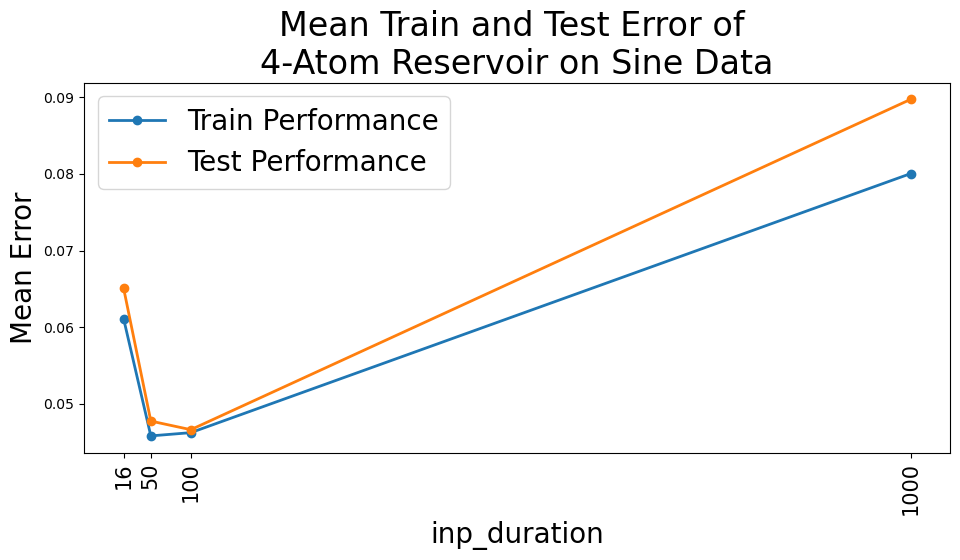

/tmp/ipykernel_8876/1799266477.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean = data.groupby([fixed_variable])['train_mae', 'test_mae'].mean()
/tmp/ipykernel_8876/1799266477.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  std = data.groupby([fixed_variable])['train_mae', 'test_mae'].std().fillna(0)


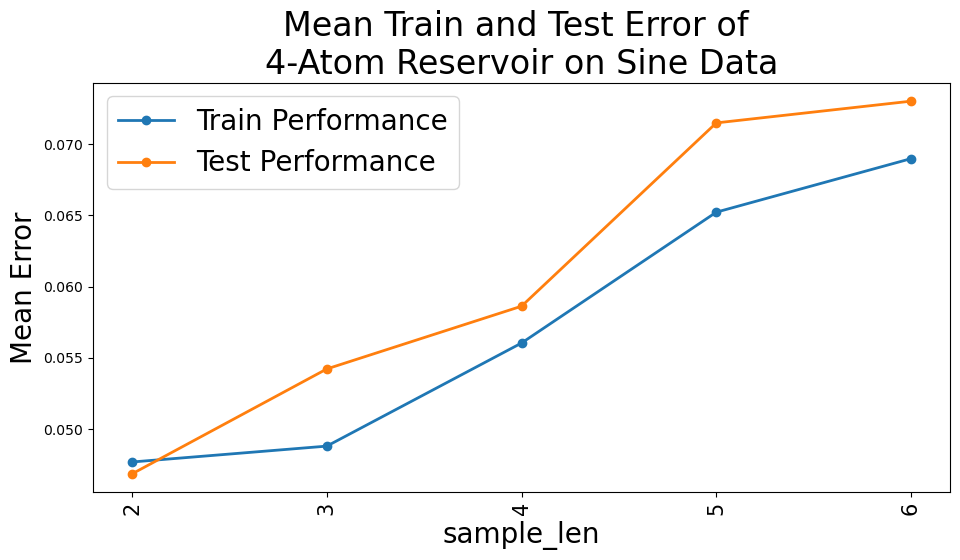

/tmp/ipykernel_8876/1799266477.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean = data.groupby([fixed_variable])['train_mae', 'test_mae'].mean()
/tmp/ipykernel_8876/1799266477.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  std = data.groupby([fixed_variable])['train_mae', 'test_mae'].std().fillna(0)


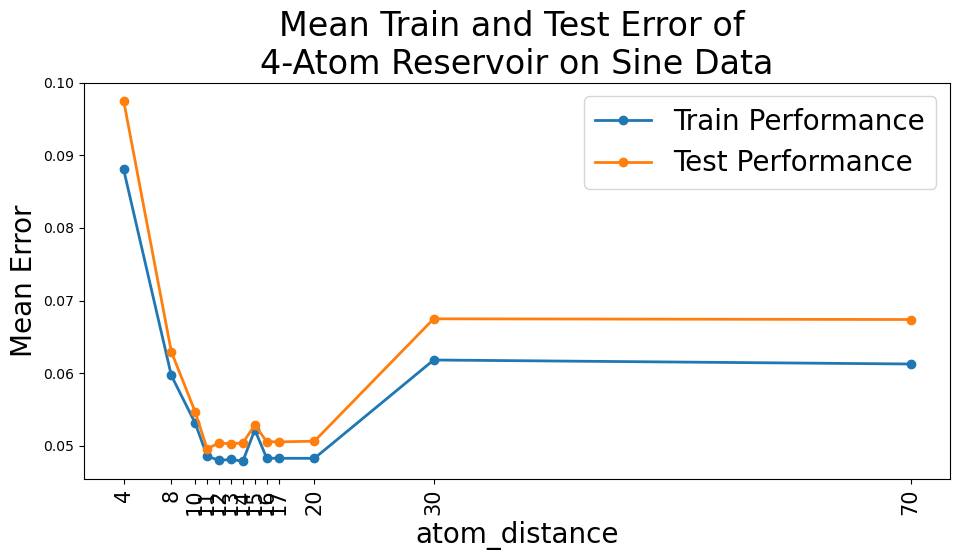

/tmp/ipykernel_8876/1799266477.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean = data.groupby([fixed_variable])['train_mae', 'test_mae'].mean()
/tmp/ipykernel_8876/1799266477.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  std = data.groupby([fixed_variable])['train_mae', 'test_mae'].std().fillna(0)


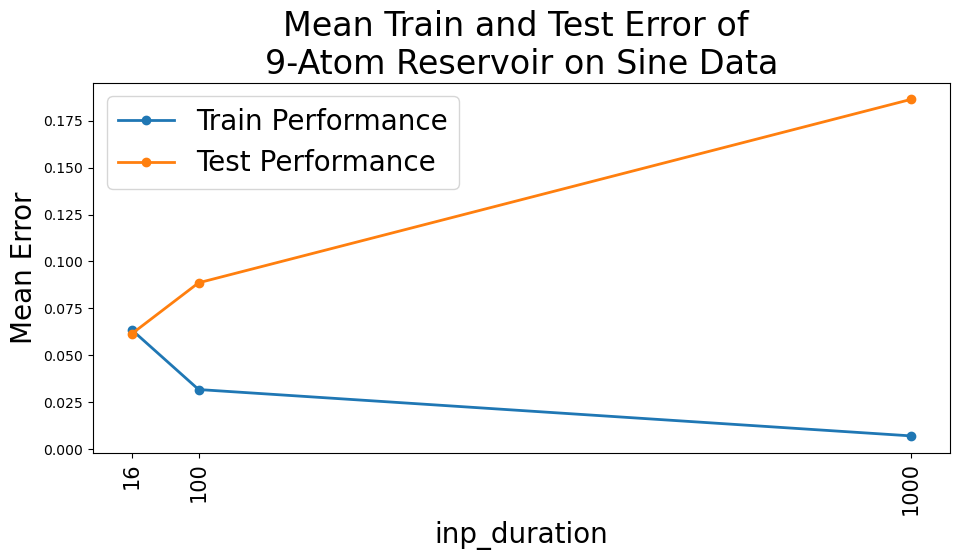

/tmp/ipykernel_8876/1799266477.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean = data.groupby([fixed_variable])['train_mae', 'test_mae'].mean()
/tmp/ipykernel_8876/1799266477.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  std = data.groupby([fixed_variable])['train_mae', 'test_mae'].std().fillna(0)


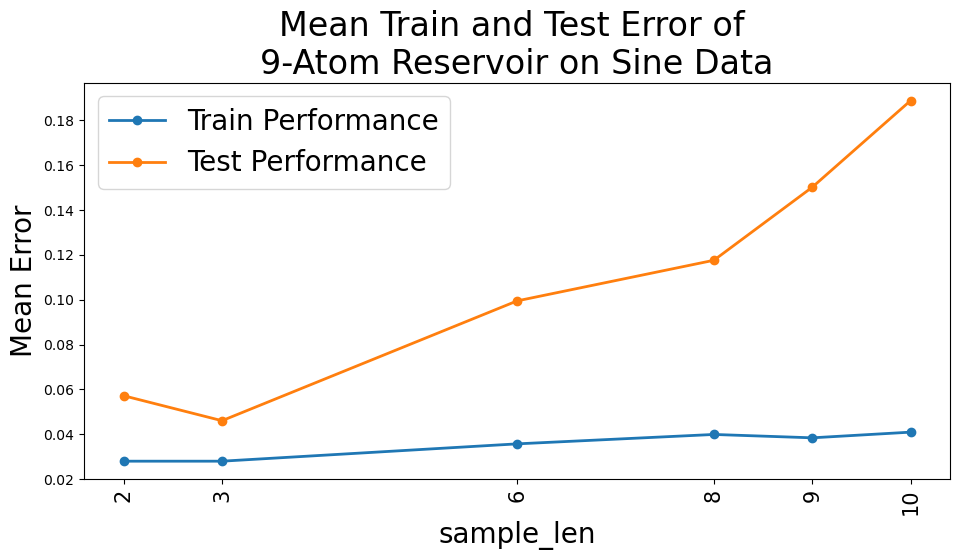

/tmp/ipykernel_8876/1799266477.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean = data.groupby([fixed_variable])['train_mae', 'test_mae'].mean()
/tmp/ipykernel_8876/1799266477.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  std = data.groupby([fixed_variable])['train_mae', 'test_mae'].std().fillna(0)


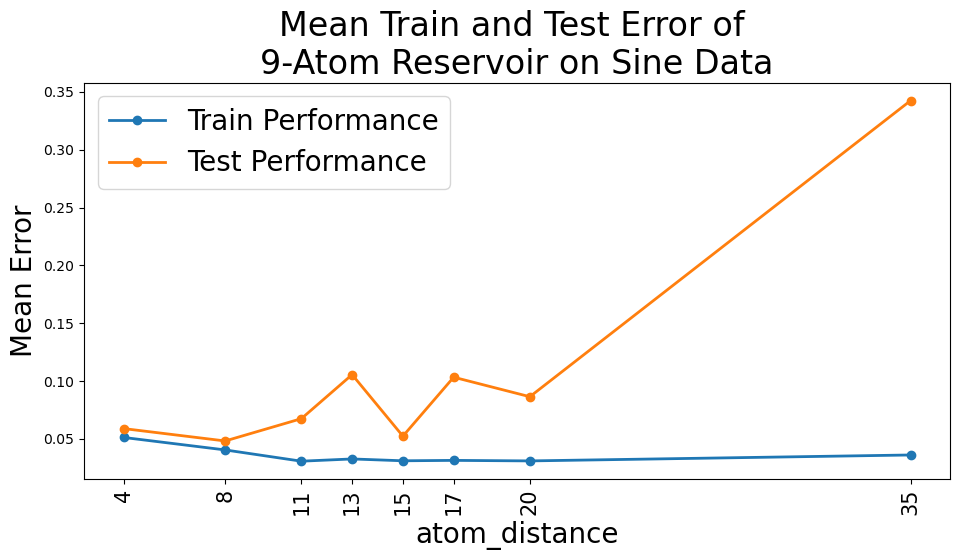

In [8]:
for n in [4, 9]:
    if n == 4:
        data = sine_4
    
    elif n== 9:
        data = sine_9

    for var in variables:

        mean, std, plus_std_train, minus_std_train, plus_std_test, minus_std_test, index = calculate_mean_and_std_by_variable(data, var)

        plt.figure(figsize=(10,6), tight_layout=True)#plotting

        plt.rcParams.update({'font.size': 20})
        plt.rc('xtick', labelsize=15)
        plt.rc('ytick', labelsize=10)
        plt.xticks(rotation=90)

        plt.plot(mean[["train_mae"]], 'o-',  linewidth=2)#customization
        plt.plot(mean[["test_mae"]], 'o-',  linewidth=2)

        # plt.fill_between(index, plus_std_train, minus_std_train, facecolor='blue', alpha=0.3)
        # plt.fill_between(index, plus_std_test, minus_std_test, facecolor='orange', alpha=0.3)

        plt.xticks(index)
        plt.xlabel(var)
        plt.ylabel('Mean Error')
        plt.title('Mean Train and Test Error of \n'+str(n)+'-Atom Reservoir on Sine Data')
        plt.legend(labels=['Train Performance', 'Test Performance'])
        plt.show()



In [9]:
sine_9['sample_len'].unique()

array([ 2,  3,  6,  8,  9, 10])

## Find models that perform better than linreg

In [10]:
sine_9_better_test = sine_9[sine_9['test_mae'] < 0.01262] # filter only models that perform better than linear regression

In [11]:
sine_9_better_test

,input_data,train_len,test_len,inp_duration,N_samples,sample_len,reset_rate,nb_atoms,geometry,atom_distance,train_mae,test_mae
60,sine,250,30,1000,1024,6,0,9,grid_lattice_centred,15,1.488404e-14,0.010181
63,sine,250,30,1000,1024,8,0,9,grid_lattice_centred,15,3.509016e-15,0.006627
69,sine,250,30,1000,1024,10,0,9,grid_lattice_centred,15,7.807412e-15,0.012047
139,sine,250,30,1000,1024,6,0,9,grid_lattice_centred,13,1.314079e-14,0.012054


In [12]:
sine_9["atom_distance"].unique()

array([ 4,  8, 15, 35, 11, 13, 17, 20])

## Bar plots

## Find 4 atom models that perform best

In [13]:
sine_9_better_train = sine_9[sine_9['train_mae'] < 0.015925]

sine_4_sorted_test = sine_4.sort_values(by=['test_mae'])[:7] # filter the 7 best model to look for a pattern

sine_4_sorted_train = sine_4.sort_values(by=['train_mae'])[:7]

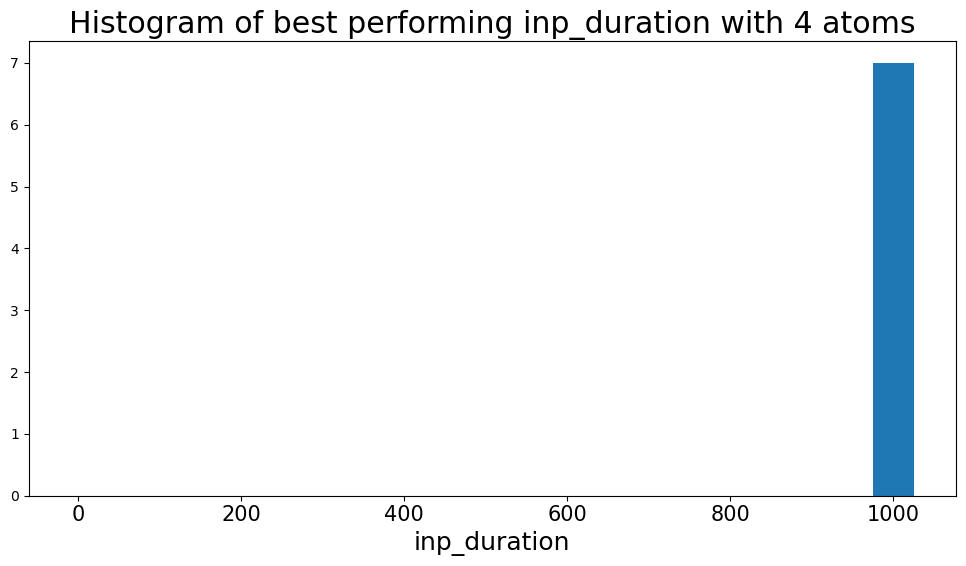

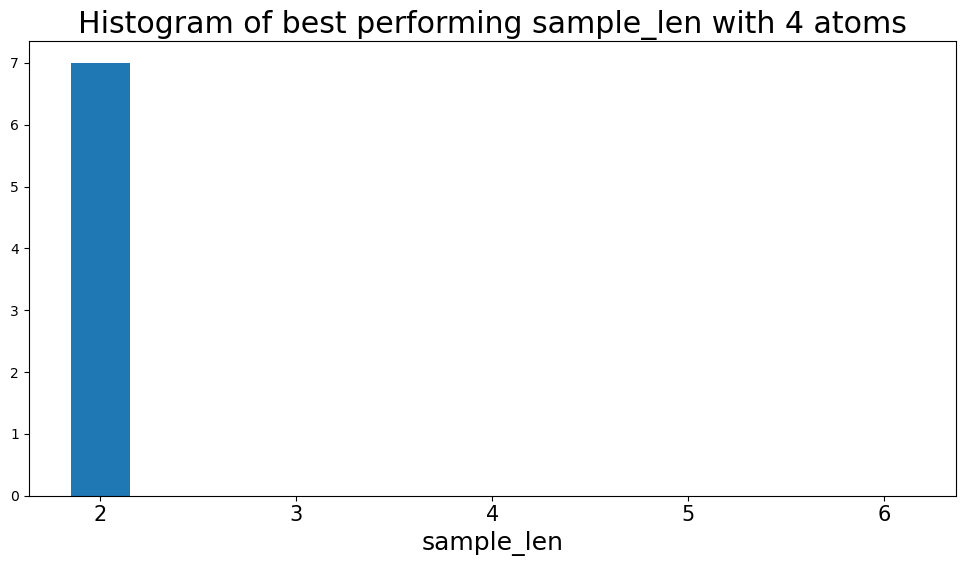

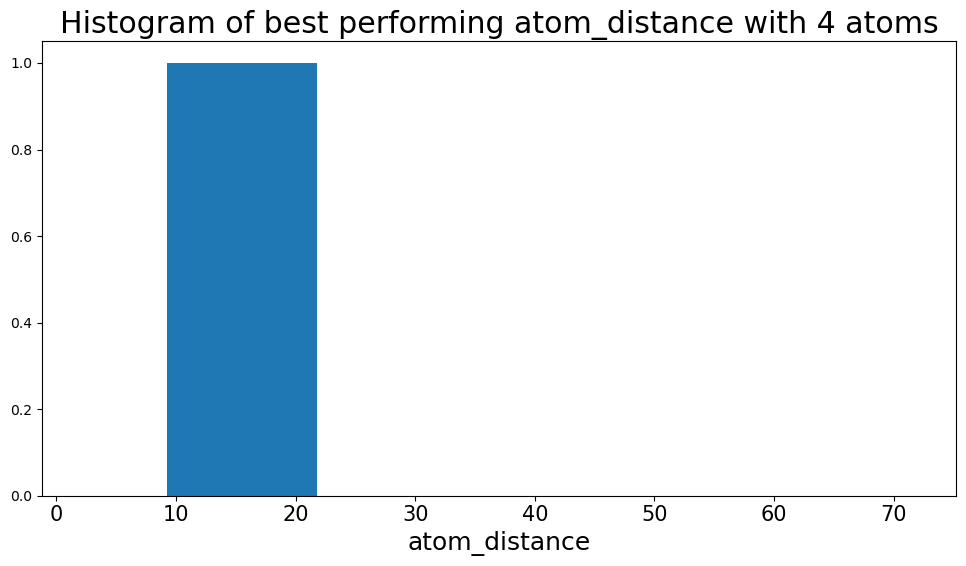

In [14]:
for var in variables:
    
    plt.rcParams.update({'font.size': 18})
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=10)
    
    plt.figure(figsize=(10,6), tight_layout=True)
    
    
    x = sine_4[var].unique()
    height = [len(sine_4_sorted_test[sine_4_sorted_test[var]==i]) for i in x]
    
    plt.xlabel(var)
    plt.title('Histogram of best performing '+var+' with 4 atoms')
    plt.bar(x, height, width=0.05*max(x))
    
    # plt.savefig(MAINPATH+'/4_qubits_sine_'+var+'_hist.png')
    
    plt.show()

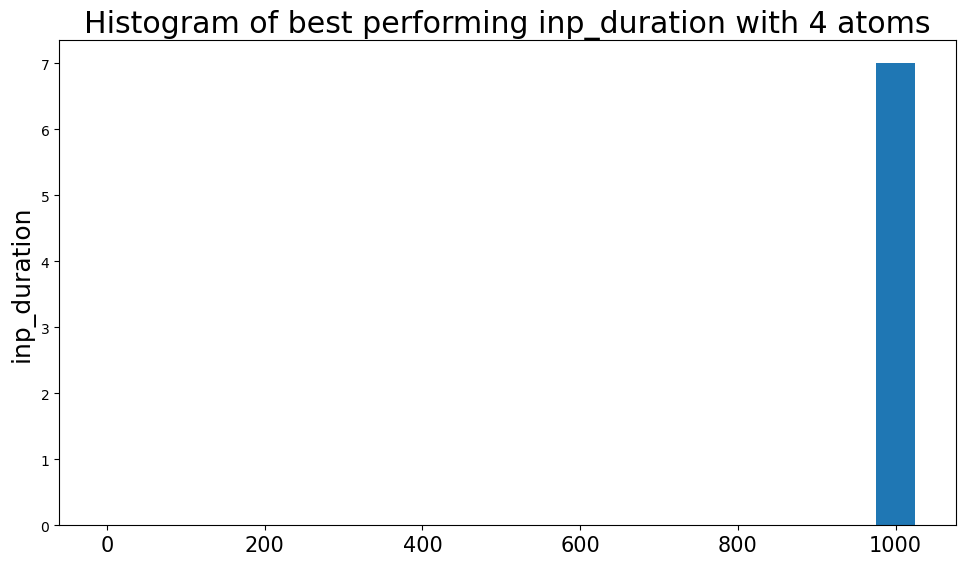

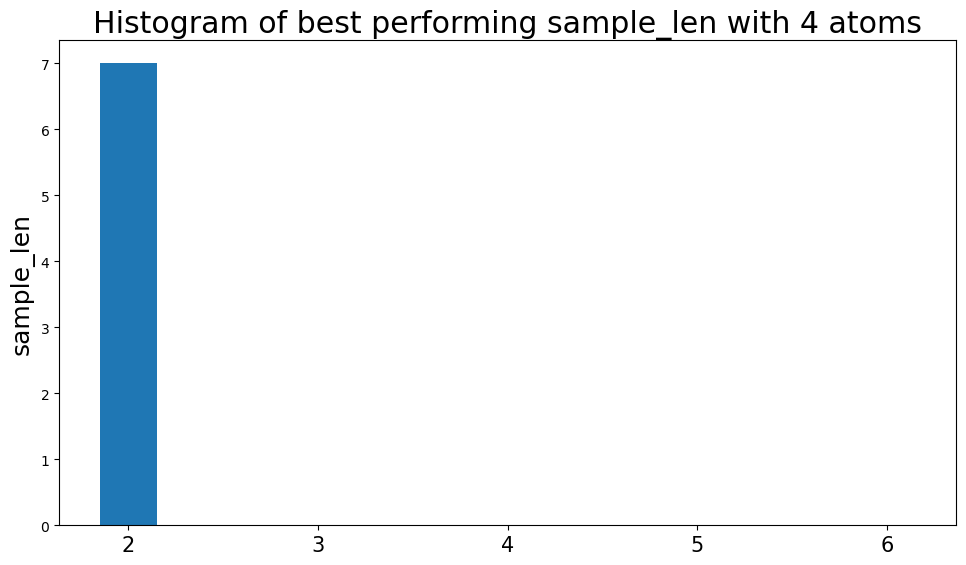

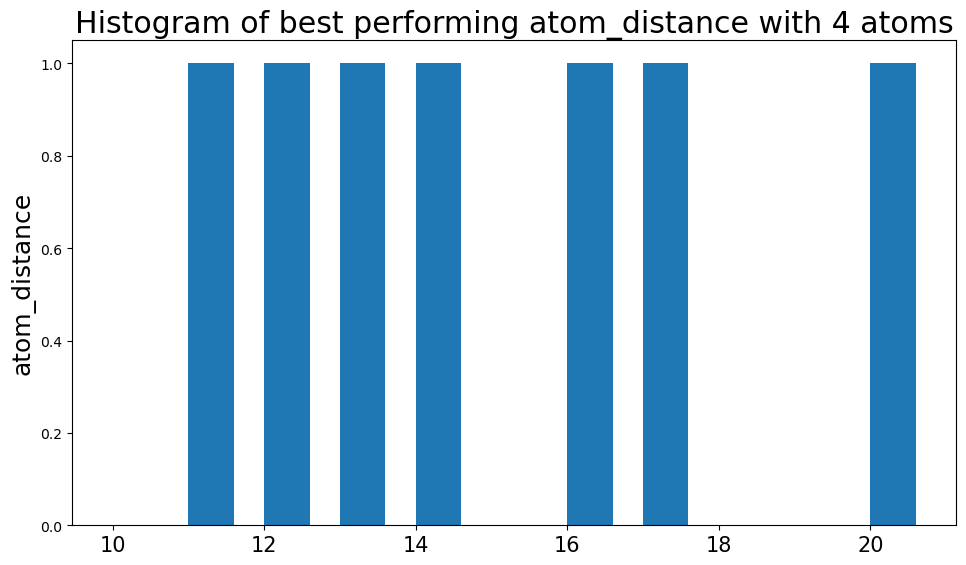

In [15]:
for var in variables:
    
    plt.figure(figsize=(10,6), tight_layout=True)
    
    
    x = sine_4[var].unique()
    height = [len(sine_4_sorted_test[sine_4_sorted_test[var]==i]) for i in x]
        
    plt.ylabel(var)
    plt.title('Histogram of best performing '+var+' with 4 atoms')
    plt.savefig(MAINPATH+'/4_qubits_sine_'+var+'_hist.png')
    
    if var == 'atom_distance':
        x = [i for i in range(10, 21)]
        height = [len(sine_4_sorted_test[sine_4_sorted_test[var]==i]) for i in x]
        plt.bar(x, height, width=0.03*max(x), align='edge') 
    else:
        plt.bar(x, height, width=0.05*max(x), align='center')
        
    plt.savefig(MAINPATH+'/4_qubits_sine_'+var+'_hist.png')
    
    plt.show()

## Find 9 atom models that perform better than linreg on Mackey Glass

In [16]:
mackey_9_better_test = mackey_9[mackey_9['test_mae'] < 0.0174015] # filter only models that perform better than linear regression

In [17]:
mackey_9_better_test

,input_data,train_len,test_len,inp_duration,N_samples,sample_len,reset_rate,nb_atoms,geometry,atom_distance,train_mae,test_mae
72,mackey,250,30,1000,1024,8,0,9,grid_lattice_centred,15,3.421735e-15,0.016877
146,mackey,250,30,1000,1024,8,0,9,grid_lattice_centred,15,5.397427e-15,0.011817


Note: We believe that row 72 was not correctly executed as when rerunning the QRC with the exact same parameters, for the parameters in rows 72 and 146, it always returns the results in row 146. During execution of the grid search, our Colab notebook crashed and we had to rerun the grid search from the parameters that had not yet been seen. There may have been a mistake in the parameter assignment at row 72.

In [18]:
mackey_9_better_train = mackey_9[mackey_9['train_mae'] < 0.023159] # filter only models that perform better than linear regression

In [19]:
mackey_9_better_train

,input_data,train_len,test_len,inp_duration,N_samples,sample_len,reset_rate,nb_atoms,geometry,atom_distance,train_mae,test_mae
52,mackey,250,50,1000,1024,9,0,9,grid_lattice_centred,35,1.000633e-02,0.634720
54,mackey,250,50,1000,1024,9,0,9,grid_lattice_centred,20,1.652090e-14,0.213531
71,mackey,250,30,1000,1024,6,0,9,grid_lattice_centred,15,6.810922e-15,0.025628
72,mackey,250,30,1000,1024,8,0,9,grid_lattice_centred,15,3.421735e-15,0.016877
73,mackey,250,30,1000,1024,10,0,9,grid_lattice_centred,15,3.647545e-15,0.018028
146,mackey,250,30,1000,1024,8,0,9,grid_lattice_centred,15,5.397427e-15,0.011817
